In [20]:
!apt update
!apt-get install -y xvfb
%pip install opencv-python-headless opencv-python scikit-learn numpy matplotlib pyvirtualdisplay
%conda install -c conda-forge opencv
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/workspaces/ComplexNetworks/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.17518250175564803


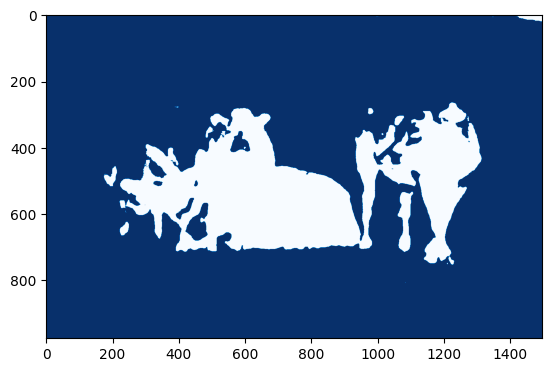

In [31]:
def separate_foreground_background(image_path, num_clusters=2):
    # Read the image
    image = cv2.imread(image_path)

    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)

    # Get the labels assigned to each pixel
    labels = kmeans.labels_

    # Reshape the labels to the original image shape
    segmented_image = labels.reshape(image.shape[:2])

    # Assuming foreground is the cluster with the most pixels
    foreground_label = np.argmax(np.bincount(segmented_image.flatten()))

    # Create a binary mask for the foreground
    foreground_mask = (segmented_image == foreground_label).astype(np.uint8)

    return foreground_mask

# Separate foreground and background for a.png
foreground_mask_a = separate_foreground_background("./a.png")

# accuracy of a.png
foreground_mask_a_correct = np.zeros_like(foreground_mask_a)

print(accuracy_score(foreground_mask_a.flatten(), foreground_mask_a_correct.flatten()))

# show a.png
import matplotlib.pyplot as plt

plt.imshow(foreground_mask_a, cmap="Blues")
plt.show()